In [1]:
import re
from time import sleep
from collections import defaultdict

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

# use this line instead if your Jupyter allows it
# from tqdm.notebook import tqdm

import rcimport
import rankcentrality as rank

plt.rc("text", usetex=True)  # disable this line if LaTeX is not installed.

## Pairwise comparisons without features

In [2]:
n = 200
m_arr = [100, 200, 400, 800, 1600, 3200, 6400, 12800]

In [3]:
exp = "1overn"
w = np.arange(1, n + 1).astype(float)

In [4]:
num_draws = 40
w_hat_dict = defaultdict(lambda: [[] for _ in m_arr])
for m_ind, m in enumerate(tqdm(m_arr)):
    for _ in range(num_draws):
        sleep(0.00001)  # odd ARPACK errors without this...
        comps, comp_results = rank.generate.simulate_comparisons(w, m)
        rc = rank.RankCentrality(n, comps[:m], comp_results[:m])
        btl = rank.BTLMLE(n, comps[:m], comp_results[:m])
        w_hat_dict["RC"][m_ind].append(rc.run())
        for epsinv in [32, 64, 128]:
            eps = 1 / epsinv
            w_hat_dict[f"reg-RC $\lambda = {epsinv}^{{-1}}$"][m_ind].append(
                rc.run_regularized(eps)
            )
        w_hat_dict["regRC-decayed"][m_ind].append(
            rc.run_regularized_decayed(10)
        )
        w_hat_dict["BTL-MLE"][m_ind].append(btl.run())

100%|██████████| 8/8 [00:24<00:00,  3.00s/it]


In [5]:
loss = "2"
metrics = rank.stats.compute_experiment_metrics(
    w_hat_dict, w, loss, len(m_arr), num_draws
)

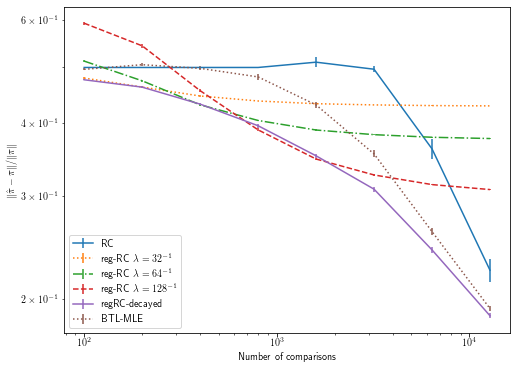

In [6]:
f, ax = rank.stats.plot_experiment_metrics(metrics, m_arr, loss)
f.set_size_inches(8, 6)

In [7]:
df = rank.stats.experiment_metrics_to_dataframe(metrics, m_arr)

In [8]:
df.to_csv(f"../output/regRC_{exp}exp_loss{loss}_n{n}_draws{num_draws}.csv")

In [9]:
loss = "kt"
metrics = rank.stats.compute_experiment_metrics(
    w_hat_dict, w, loss, len(m_arr), num_draws
)

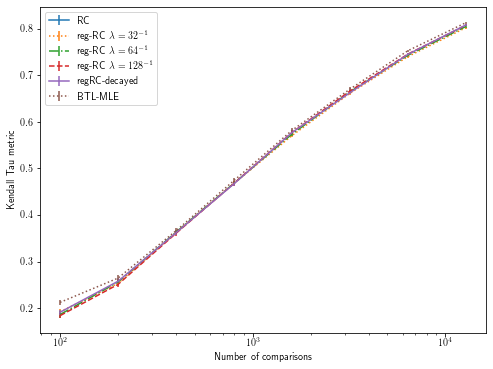

In [10]:
f, ax = rank.stats.plot_experiment_metrics(metrics, m_arr, loss)
f.set_size_inches(8, 6)

In [11]:
df = rank.stats.experiment_metrics_to_dataframe(metrics, m_arr)

In [12]:
df.to_csv(f"../output/regRC_{exp}exp_loss{loss}_n{n}_draws{num_draws}.csv")